In [ ]:
%matplotlib inline 
#グラフをnotebook内に描画させるための設定
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
# from IPython.display import display

### データを読み込む

In [64]:
df_data = pd.read_csv("../1_data/mushrooms.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### 欠損値の確認

In [65]:
df_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 可視化

In [71]:
# Y（目的関数）：class（毒があるかどうか）　X（説明関数）：cap-shape, cap-surface, cap-color, bruises（傷があるかどうか）の相関を見る

# class の置換
class_mapping = {'e': 0, 'p': 1}
bruises_mapping = {'f': 0, 't': 1}
df = df_data.copy()
df["class"] = df_data['class'].map(class_mapping)
df["bruises"] = df_data['bruises'].map(bruises_mapping)
print("置換条件=",class_mapping,bruises_mapping)

# 取り出す
y_var = "class"
X_var = ["cap-shape","cap-surface","cap-color","bruises"]
df = df[[y_var]+ X_var]
display(df.head())

# pandasの関数を用いてone-hotベクトルに変換する
df = pd.get_dummies(df)
print("one hot encoder")
display(df.head())


置換条件= {'e': 0, 'p': 1} {'f': 0, 't': 1}


,class,cap-shape,cap-surface,cap-color,bruises
0,1,x,s,n,1
1,0,x,s,y,1
2,0,b,s,w,1
3,1,x,y,w,1
4,0,x,s,g,0


one hot encoder


,class,bruises,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
# 相関関数
df.corr().style.background_gradient().format('{:.2f}')

,class,bruises,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
class,1.00,-0.50,-0.18,0.02,0.02,0.16,-0.06,-0.03,-0.20,0.02,0.10,0.09,0.07,-0.03,0.10,-0.05,-0.04,0.03,-0.04,-0.04,-0.13,0.11
bruises,-0.50,1.00,0.12,0.00,0.05,-0.23,-0.05,0.05,-0.03,0.03,-0.10,0.12,0.17,-0.04,0.00,-0.05,-0.05,0.04,-0.04,-0.04,0.10,-0.03
cap-shape_b,-0.18,0.12,1.00,-0.01,-0.19,-0.08,-0.02,-0.22,-0.09,0.02,0.12,-0.03,0.01,-0.02,-0.12,-0.07,-0.08,0.02,-0.01,-0.01,0.21,0.12
cap-shape_c,0.02,0.00,-0.01,1.00,-0.02,-0.01,-0.00,-0.02,-0.01,0.25,-0.02,0.02,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.02,0.02
cap-shape_f,0.02,0.05,-0.19,-0.02,1.00,-0.27,-0.05,-0.72,0.06,-0.01,-0.09,0.03,0.02,-0.00,0.01,0.06,0.02,-0.05,0.01,0.01,-0.09,-0.01
cap-shape_k,0.16,-0.23,-0.08,-0.01,-0.27,1.00,-0.02,-0.30,-0.16,0.01,0.14,0.02,-0.00,0.04,0.16,-0.14,0.13,0.00,-0.01,-0.01,-0.07,-0.12
cap-shape_s,-0.06,-0.05,-0.02,-0.00,-0.05,-0.02,1.00,-0.06,0.10,-0.00,-0.04,-0.05,-0.01,-0.00,-0.03,0.04,0.03,-0.01,-0.00,-0.00,-0.02,-0.02
cap-shape_x,-0.03,0.05,-0.22,-0.02,-0.72,-0.30,-0.06,1.00,0.06,-0.02,-0.04,-0.02,-0.02,-0.01,-0.05,0.05,-0.06,0.04,0.00,0.00,0.03,0.03
cap-surface_f,-0.20,-0.03,-0.09,-0.01,0.06,-0.16,0.10,0.06,1.00,-0.01,-0.43,-0.52,-0.09,-0.00,-0.10,0.24,-0.10,-0.02,-0.03,-0.03,-0.03,0.04
cap-surface_g,0.02,0.03,0.02,0.25,-0.01,0.01,-0.00,-0.02,-0.01,1.00,-0.02,-0.02,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.06,-0.01


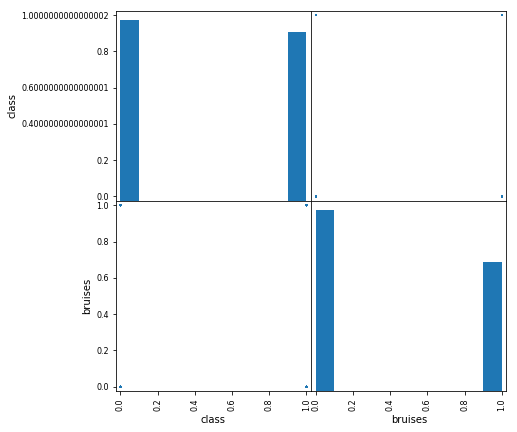

In [73]:
df2 = df[["class","bruises"]]

pd.plotting.scatter_matrix(df2,alpha=0.3,s=10, figsize=(7,7))#散布図の作成
plt.show()#グラフをここで描画させるための行

### ロジスティック回帰

In [ ]:
y = ((df.yr_renovated > 0) * 1).values
X = df.drop(['yr_renovated','date','id'],axis=1)

plt.plot(X.yr_built,y,'o')

lr = LinearRegression()

lr.fit(X.yr_built.values.reshape(-1,1),y)

plt.plot(range(X.yr_built.min(),X.yr_built.max()),lr.coef_*range(X.yr_built.min(),X.yr_built.max())+lr.intercept_)

plt.xlabel('yr_built')
plt.ylabel('class')